# Behavioural analysis

## Preparing the data

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

Loading the data:

In [65]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcvct'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
subjDir = allSubjDirs[0] # this will eventually go through a loop
#print subjDir
subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
#print subjFilePath
ds = pd.read_csv(subjFilePath)
print ds.head(5)
print ds.columns

     expName             time  participant  session  trialN  dirL  dirR   vL  \
0  mcvct_bv0  2016-10-18_1556            0        1       1   180     0  0.6   
1  mcvct_bv0  2016-10-18_1556            0        1       2     0   180  1.2   
2  mcvct_bv0  2016-10-18_1556            0        1       3     0   180  4.8   
3  mcvct_bv0  2016-10-18_1556            0        1       4     0   180  4.8   
4  mcvct_bv0  2016-10-18_1556            0        1       5     0   180  2.4   

    vR  szL     ...      nf000  nf090  nf180  nf270     pd000  pd090  pd180  \
0  4.8  256     ...          0      0      0      1  0.000000      0      0   
1  2.4  256     ...          1      0      0      0  0.016667      0      0   
2  9.6  256     ...          1      0      0      0  0.016667      0      0   
3  0.3  256     ...          0      0      0      1  0.000000      0      0   
4  0.0  256     ...          0      0      0      1  0.000000      0      0   

      pd270  qnResp      ringSz  
0  0.01666

For each participant, plotting the number of left/right/up/down responses throughout the trial. Transforming the data set first.

In [66]:
ds['vDiffR'] = ds['vR'] - ds['vL']
ds['nfR'] = ds['nf000'] - ds['nf180']
ds.ix[ds['dirL']==0,'v000'] = ds['vL']
ds.ix[ds['dirR']==0,'v000'] = ds['vR']
ds.ix[ds['dirL']==180,'v180'] = ds['vL']
ds.ix[ds['dirR']==180,'v180'] = ds['vR']
print ds.head(5)
#df = pd.melt(ds, id_vars=['trialN','dirL','dirR','vL','vR','colorNameL','colorNameR','fovGap'],
#             value_vars=['pd000','pd090','pd180','pd270'])
#df = df.rename(columns={'variable': 'angle', 'value': 'predominance'})
#print df.head(5)

     expName             time  participant  session  trialN  dirL  dirR   vL  \
0  mcvct_bv0  2016-10-18_1556            0        1       1   180     0  0.6   
1  mcvct_bv0  2016-10-18_1556            0        1       2     0   180  1.2   
2  mcvct_bv0  2016-10-18_1556            0        1       3     0   180  4.8   
3  mcvct_bv0  2016-10-18_1556            0        1       4     0   180  4.8   
4  mcvct_bv0  2016-10-18_1556            0        1       5     0   180  2.4   

    vR  szL ...      pd000  pd090  pd180     pd270  qnResp      ringSz  \
0  4.8  256 ...   0.000000      0      0  0.016667       0   25.800000   
1  2.4  256 ...   0.016667      0      0  0.000000       0   99.514286   
2  9.6  256 ...   0.016667      0      0  0.000000       0  136.371429   
3  0.3  256 ...   0.000000      0      0  0.016667       0  136.371429   
4  0.0  256 ...   0.000000      0      0  0.016667       0  136.371429   

   vDiffR  nfR  v000 v180  
0     4.2    0   4.8  0.6  
1     1.2    1   1

## Visualization

These plots show the speed at which the directional predominance was indicated the most (in terms of proportion).

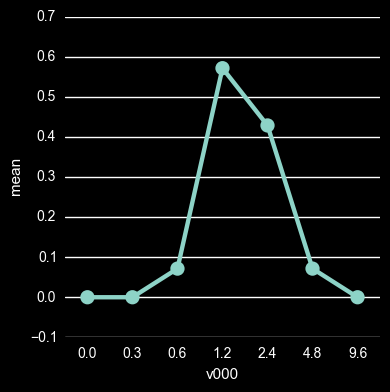

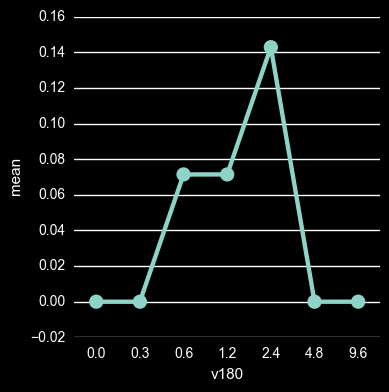

In [67]:
sumR = ds.groupby('v000', as_index=False)['nf000'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumL = ds.groupby('v180', as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumR['nf000','v000'] = sumR['v000']
sumL['nf180','v180'] = sumL['v180']
g = sns.factorplot(x='v000', y='mean', data=sumR['nf000'])
g = sns.factorplot(x='v180', y='mean', data=sumL['nf180'])

In [68]:
sumR

v000 nf000                              
         sum      mean       std size v000
0  0.0     0  0.000000  0.000000   12  0.0
1  0.3     0  0.000000  0.000000   14  0.3
2  0.6     1  0.071429  0.267261   14  0.6
3  1.2     8  0.571429  0.513553   14  1.2
4  2.4     6  0.428571  0.513553   14  2.4
5  4.8     1  0.071429  0.267261   14  4.8
6  9.6     0  0.000000  0.000000   14  9.6

In [69]:
sumL

v180 nf180                              
         sum      mean       std size v180
0  0.0     0  0.000000  0.000000   12  0.0
1  0.3     0  0.000000  0.000000   14  0.3
2  0.6     1  0.071429  0.267261   14  0.6
3  1.2     1  0.071429  0.267261   14  1.2
4  2.4     2  0.142857  0.363137   14  2.4
5  4.8     0  0.000000  0.000000   14  4.8
6  9.6     0  0.000000  0.000000   14  9.6

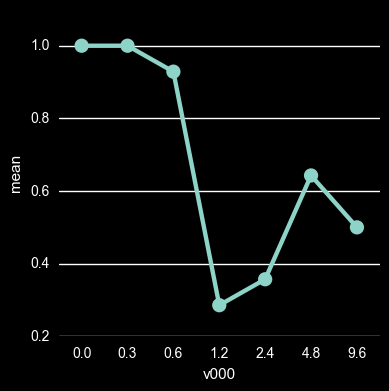

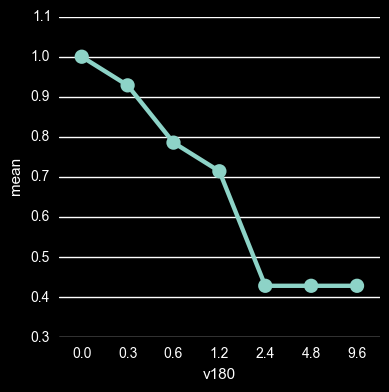

In [70]:
sumDR = ds.groupby('v000', as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumDL = ds.groupby('v180', as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumDR['nf270','v000'] = sumDR['v000']
sumDL['nf270','v180'] = sumDL['v180']
g = sns.factorplot(x='v000', y='mean', data=sumDR['nf270'])
g = sns.factorplot(x='v180', y='mean', data=sumDL['nf270'])

Looking at the instances of when the ring occurred vs. when it didn't (proportion), and large was the resulting ring in those instances (mean ring size).

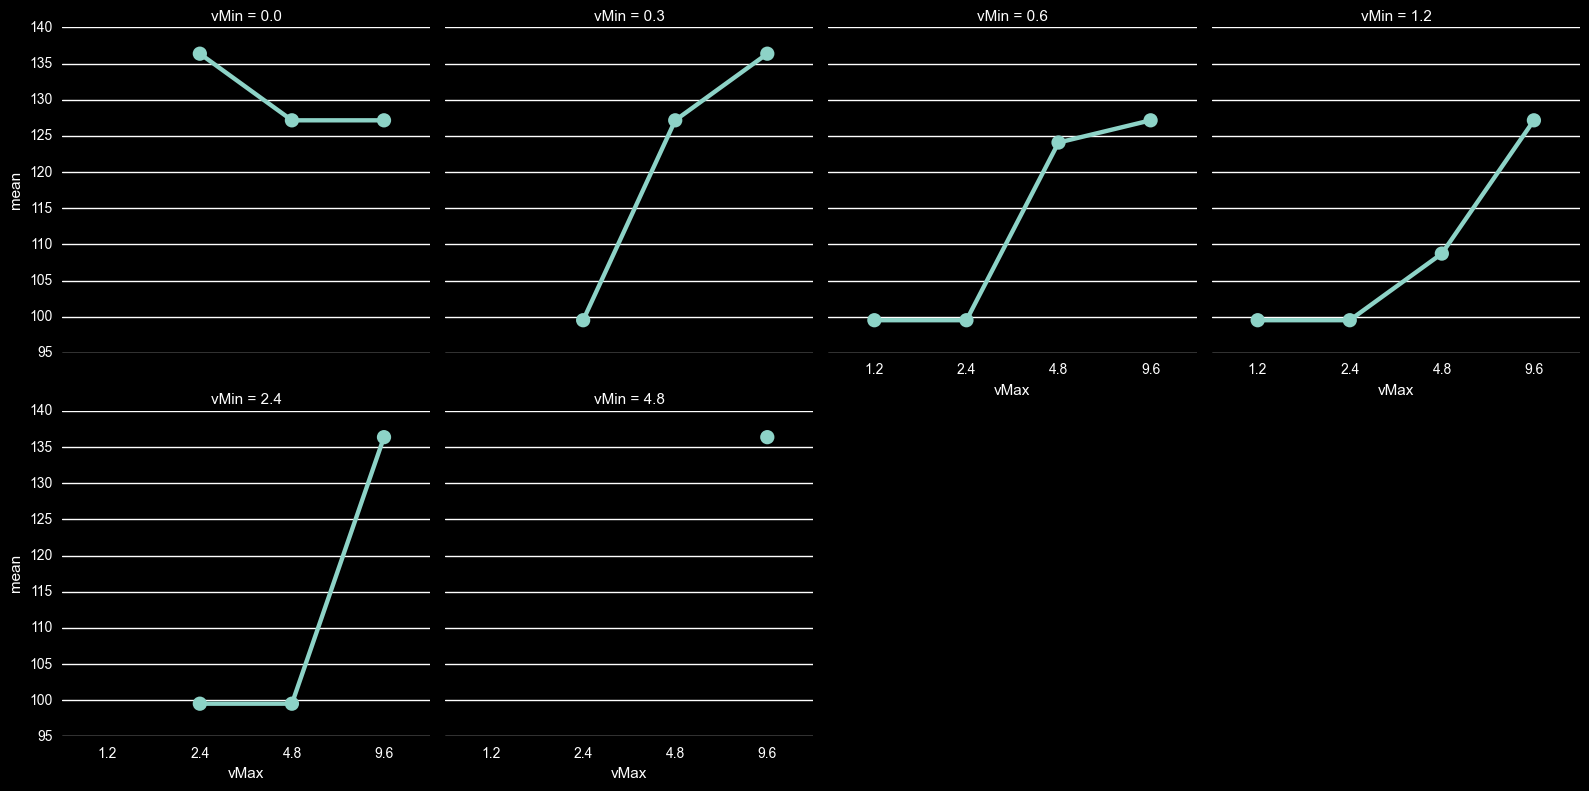

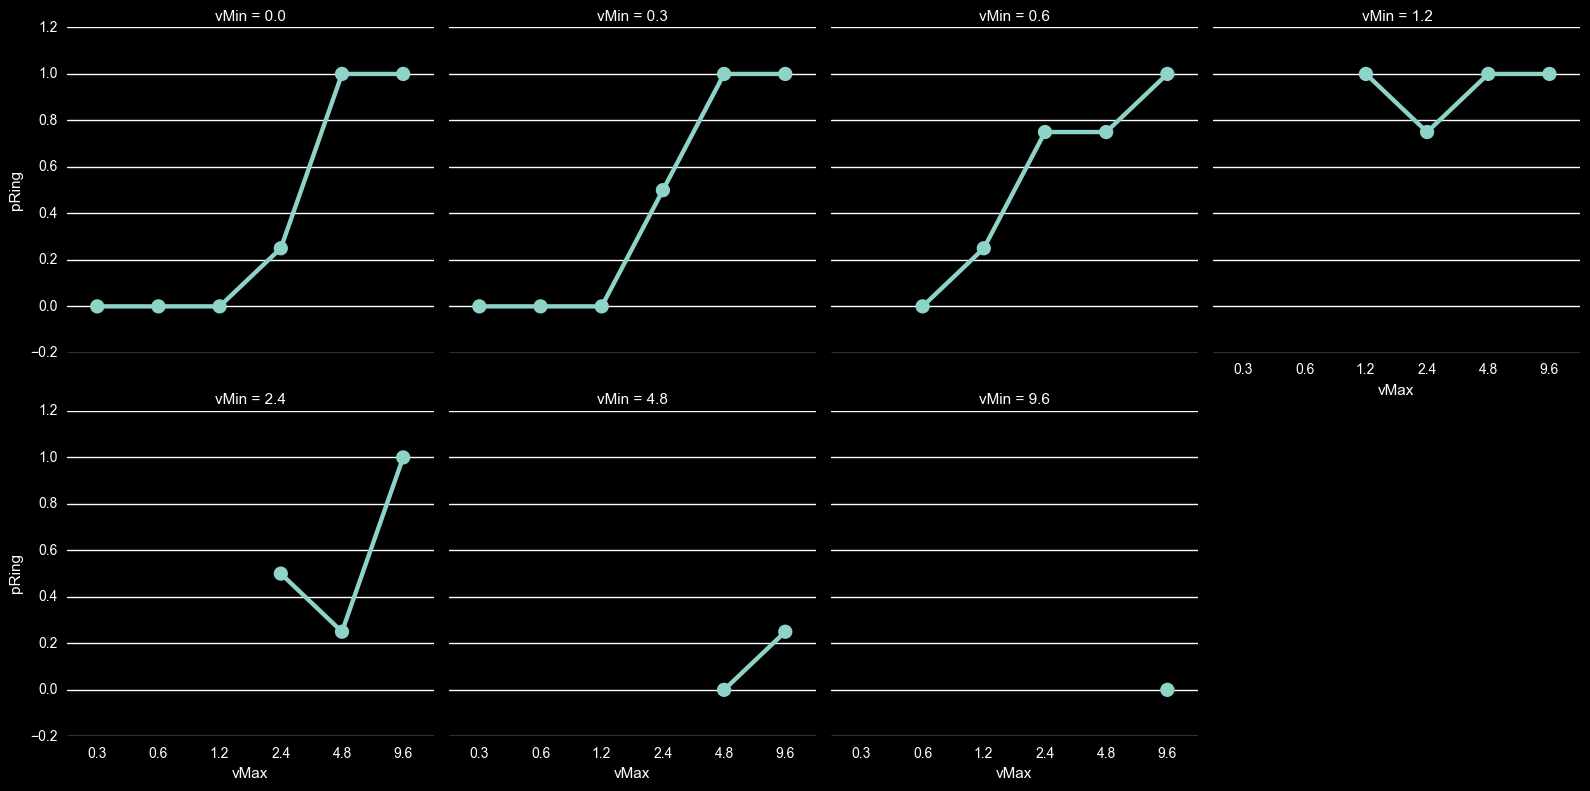

In [72]:
# Rewring the ring size column so that the minimum size is equated to zero:
ds.ix[ds['ringSz']==25.8,'ringSz'] = 0
# Creating columns for the slower and faster of the two speeds:
ds['vMin'] = np.amin([ds['vL'], ds['vR']], axis=0)
ds['vMax'] = np.amax([ds['vL'], ds['vR']], axis=0)
# Computing the proportion of instances when the ring has occurred:
sumMM_p = ds.groupby(['vMin','vMax'], as_index=False)['ringSz'].agg([np.count_nonzero, np.size]).reset_index()
sumMM_p['ringSz','pRing'] = sumMM_p['ringSz','count_nonzero'] / sumMM_p['ringSz','size']
sumMM_p['ringSz','vMin'] = sumMM_p['vMin']
sumMM_p['ringSz','vMax'] = sumMM_p['vMax']
#print sumMM_p['ringSz']
# Getting the subset where the ring size is nonzero and computing the mean size:
ss = ds[ds.ringSz!=0]
sumMM_m = ss.groupby(['vMin','vMax'], as_index=False)['ringSz'].agg([np.mean, np.std]).reset_index()
sumMM_m['ringSz','vMin'] = sumMM_m['vMin']
sumMM_m['ringSz','vMax'] = sumMM_m['vMax']
#print sumMM_m['ringSz']
# Plotting:
sns.factorplot(x='vMax', y='mean', col='vMin', data=sumMM_m['ringSz'], col_wrap=4)
sns.factorplot(x='vMax', y='pRing', col='vMin', data=sumMM_p['ringSz'], col_wrap=4)

# Eye-tracking data

## Data import

In [117]:
subjEtPath = glob.glob(subjDir + '/' + 'data.asc')[0]
print subjEtPath
# Importing the data set the first time, with all the accompanying mess, for reading messages:
with open(subjEtPath) as f:
    mess = f.readlines()
# A cleaner import using cili to just read out the ET data:
from cili.util import *
from cili.cleanup import *
samps, events = load_eyelink_dataset(subjEtPath)
# Optional cleaning (probably not necessary):
#samps = interp_eyelink_blinks(samps, events, interp_fields=["pup_l"])
#samps = interp_zeros(samps, interp_fields=["pup_l"])
print samps.head(5)
# cili's native extraction of ranges for each event unfortunately doesn't work, although...
# ... I probably don't need it anyway:
#from cili.extract import extract_event_ranges
#ranges = extract_event_ranges(samps, events, end_offset=1000)
# With the 'messy' data set, creating a lookup table with the trial numbers and time stamps:
trialStr = [s for s in mess if 'TRIALID' in s]
trialTS = [s[s.index('\t')+1:s.index(' T')] for s in trialStr]
trialN = [s[s.index('D ')+1:s.index('\n')] for s in trialStr]
trials = pd.DataFrame({'trialN' : trialN, 'trialTS' : trialTS})
print trials.head(5)
# Creating my own ranges for each trial, with N number of samples:
nSamples = 1500


/Users/egor/Dropbox/Projects/mc/data/mcvct/mcvct_p0_s1_2016-10-18_1556/data.asc
          x_l  y_l  pup_l     x_r  y_r  pup_r
onset                                        
849896  946.6  353   6787  1108.2  353   6635
849898  946.6  353   6788  1108.3  353   6639
849900  946.9  353   6790  1108.4  353   6639
849902  946.9  353   6793  1108.5  353   6639
849904  946.6  353   6794  1108.5  353   6644
  trialN trialTS
0      1  849339
1      2  858364
2      3  864897
3      4  870742
4      5  875666
